In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

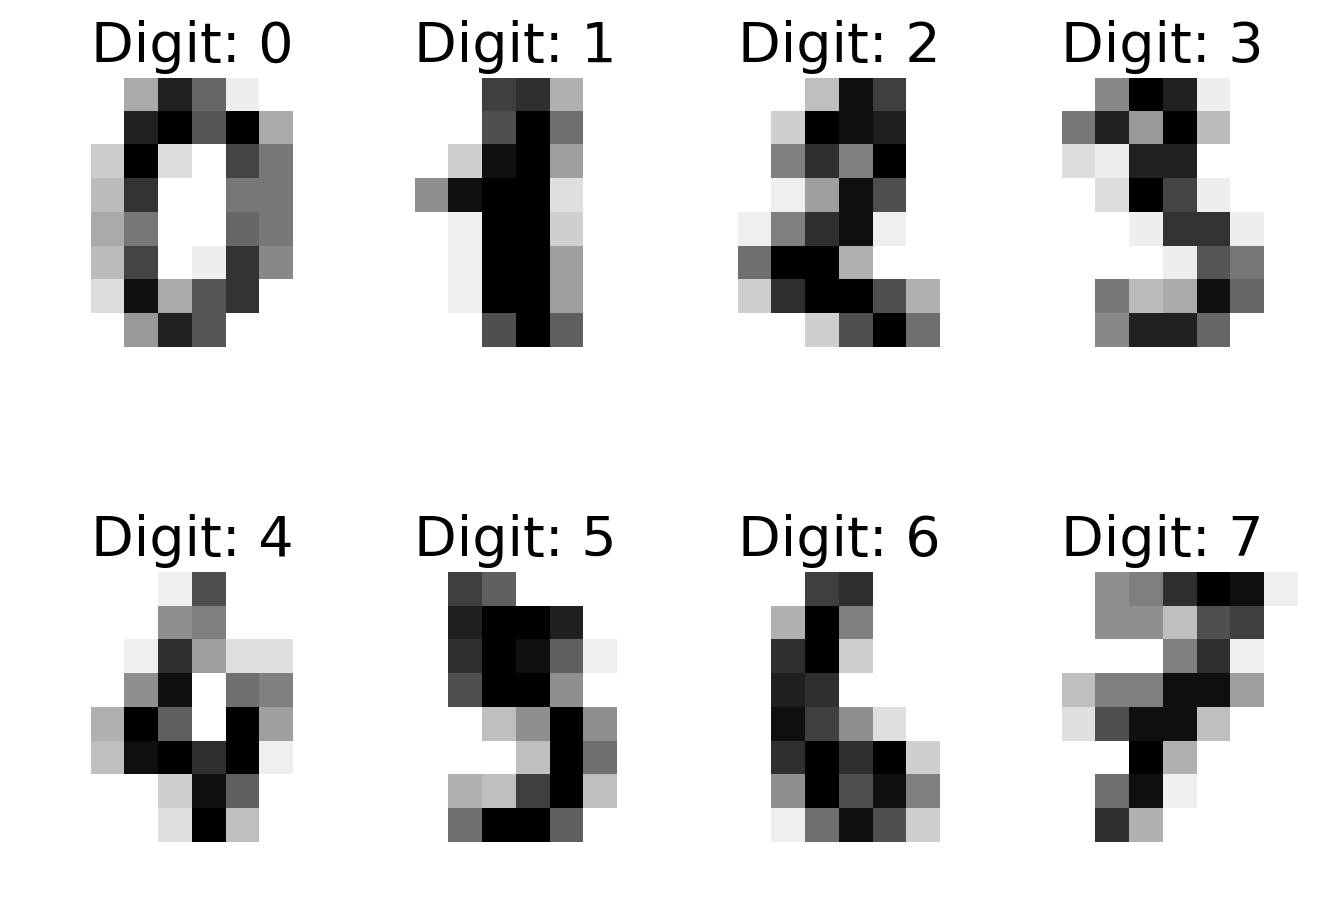

In [2]:
digits = datasets.load_digits()
# 把数据所代表的图片显示出来
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6), dpi=200)
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, fontsize=20)

In [3]:
print('shape of raw image data: {0}'.format(digits.images.shape))
print('shape of data: {0}'.format(digits.data.shape))

shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


In [4]:
# 将数据集分成训练数据集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

In [5]:
# 使用支持向量机来训练模型
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
clf.score(X_test, y_test)

0.9777777777777777

In [7]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

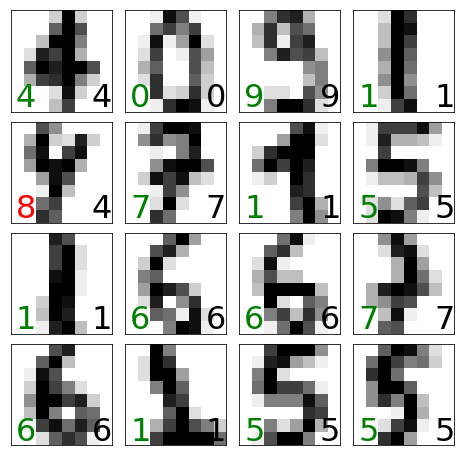

In [8]:
# 查看预测的情况
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0.05, 0.05, str(y_pred[i]), fontsize=32,
            transform=ax.transAxes,
            color='green' if y_pred[i] == y_test[i] else 'red')
    ax.text(0.8, 0.05, str(y_test[i]), fontsize=32,
            transform=ax.transAxes,
            color='black')
    ax.set_xticks([])
    ax.set_yticks([])